## Importing the libraries

In [1]:
!pip install -U ultralytics

import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

/Users/anishsoni/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Importing the images

In [2]:
image = cv2.imread("/Users/anishsoni/Desktop/Machine-Learning/Computer Vision/Road Mark Detection/dataset/train/images/2_jpg.rf.5ef43fe6e93a49aabbbe5901c2469cf6.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 640x640 and 3 channels.


## Importing the Model

In [3]:
model = YOLO("yolov8n.pt")

In [4]:
# Use the model to detect object
image = "/Users/anishsoni/Desktop/Machine-Learning/Computer Vision/Road Mark Detection/dataset/train/images/2_jpg.rf.5ef43fe6e93a49aabbbe5901c2469cf6.jpg"
result_predict = model.predict(source = image, imgsz = (640))


image 1/1 /Users/anishsoni/Desktop/Machine-Learning/Computer Vision/Road Mark Detection/dataset/train/images/2_jpg.rf.5ef43fe6e93a49aabbbe5901c2469cf6.jpg: 640x640 1 potted plant, 97.2ms
Speed: 3.0ms preprocess, 97.2ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


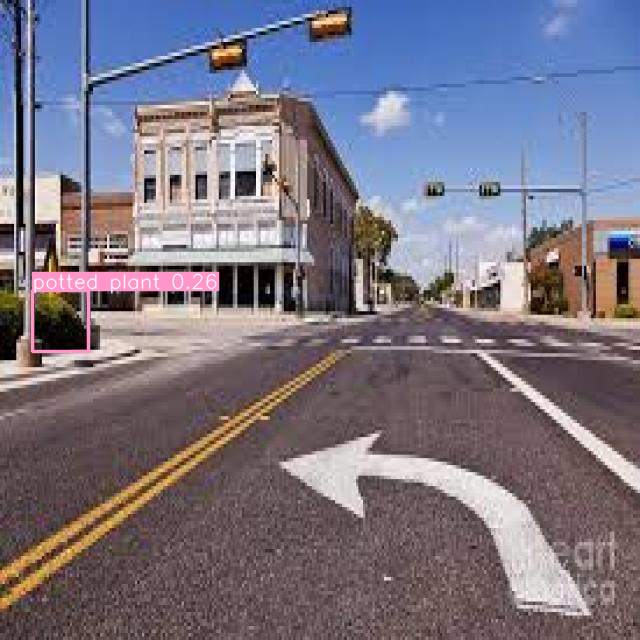

In [5]:
#show the result
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))
#display the image from array

In [6]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt') 


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [ ]:
#Training the Final Model
Result_Final_model = Final_model.train(data="/Users/anishsoni/Desktop/Machine-Learning/Computer Vision/Road Mark Detection/dataset/data.yaml",epochs=20, imgsz = 640, batch = 64 ,lr0=0.001, dropout= 0.15, device = 'cpu')

Ultralytics YOLOv8.0.226 🚀 Python-3.10.9 torch-2.1.0 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/Users/anishsoni/Desktop/Machine-Learning/Computer Vision/Road Mark Detection/dataset/data.yaml, epochs=20, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

Fontconfig warning: ignoring UTF-8: not a valid region tag


YOLOv8n summary: 225 layers, 3013383 parameters, 3013367 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir /Users/anishsoni/runs/detect/train3', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /Users/anishsoni/Desktop/Machine-Learning/Computer Vision/Road M
val: Scanning /Users/anishsoni/Desktop/Machine-Learning/Computer Vision/Road Mar

Plotting labels to /Users/anishsoni/runs/detect/train3/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /Users/anishsoni/runs/detect/train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.758      4.984      1.549        454        640:  

In [ ]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]
for i in list_of_metrics:
    img = cv2.imread(f"/kaggle/working/runs/detect/train/{i}")
    plt.figure(figsize = (16, 12))
    plt.imshow(np.array(img))
    plt.show()

In [ ]:
results = pd.read_csv("/kaggle/working/runs/detect/train/results.csv")
results.head()

In [ ]:
results.columns = results.columns.str.strip()
